In [1]:
##Company losing business and we have to analyze how to save it

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
ret = pd.read_csv('retail_analytics.csv',encoding = 'latin1')

In [14]:
ret.head()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
0,April'16,2-Apr-16,EC02041646800,Dealer,Won,TAMILNADU,CHENNAI,600008,Renovation,6 to 10,...,NaN,NaN,1105,Aesthetics & Street Noise,1.0,1.0,0.0,0.0,0.0,0.0
1,April'16,8-Apr-16,EC08041647157,Dealer,Lost,TAMILNADU,CHENNAI,600042,New Construction,6 to 10,...,NaN,Price Issue,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,April'16,8-Apr-16,EC08041647130,Dealer,Lost,TAMILNADU,CHENNAI,600015,New Construction,1 to 5,...,NaN,Delivery Issue,918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,April'16,9-Apr-16,EC09041647202,Direct,Lost,TAMILNADU,KANCHIPURAM,600075,New Construction,21 to 40,...,NaN,Price Issue,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,April'16,11-Apr-16,EC11041647360,Direct,Won,TAMILNADU,CHENNAI,600041,Renovation,6 to 10,...,NaN,NaN,1350,Reduce AC Energy Cost,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
ret.columns

Index(['Month', 'Enquiry Date', 'Enquiry Id', 'Allocation Status', 'Status',
       'State', 'City', 'Pincode', 'Type of Project', 'No of Windows',
       'Source', 'Zone', 'Dealer Name', 'First Action-Call made',
       'Date DD/MM/YY', 'First Action-Call Status',
       'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date DD/MM/YY.1', 'Second Action-Call Status',
       'Third Action-Quote Given', 'Date DD/MM/YY.2', 'Q Val. (Rs. Lac)',
       'Quote QTY', ' Order Recd\Lost ', 'Date DD/MM/YY.3',
       'Order Val. (Rs. Lac)', 'Order QTY',
       'Quote ID (as per match to CCC Records)',
       ' Remarks-Brand and value if lost to UPVC ',
       'Second Action-Call Status.1', 'Remarks', 'Price Per Sft', 'Benefits',
       'Aesthetics', 'Reduce Street Noise', 'Low Maintenance', 'Monsoon Proof',
       'Better Lighting', 'Reduce AC Energy Cost'],
      dtype='object')

In [16]:
ret.describe()

,Pincode,Q Val. (Rs. Lac),Order Val. (Rs. Lac),Order QTY,Second Action-Call Status.1,Price Per Sft,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
count,229.000000,183.000000,48.000000,48.000000,0.0,229.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,601742.572052,1.842459,1.874375,10.229167,NaN,1045.323144,0.243243,0.648649,0.486486,0.081081,0.027027,0.162162
std,6573.378113,2.595590,2.313372,14.925688,NaN,220.032076,0.434959,0.483978,0.506712,0.276725,0.164399,0.373684
min,600001.000000,0.010000,0.070000,1.000000,NaN,650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,600033.000000,0.550000,0.530000,2.000000,NaN,921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,600059.000000,1.070000,1.150000,6.000000,NaN,1030.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,600099.000000,2.000000,1.622500,10.500000,NaN,1129.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,635810.000000,25.000000,10.950000,73.000000,NaN,3121.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
ret.isnull().sum()

Month                                          0
Enquiry Date                                   0
Enquiry Id                                     0
Allocation Status                              0
Status                                         0
State                                          0
City                                           0
Pincode                                        0
Type of Project                                0
No of Windows                                  0
Source                                         0
Zone                                           0
Dealer Name                                    0
First Action-Call made                         0
Date DD/MM/YY                                  0
First Action-Call Status                       0
Date of Appointment (DD/MM/YY)                37
Second Action-Customer Meeting                37
Date DD/MM/YY.1                               37
Second Action-Call Status                     38
Third Action-Quote G

In [18]:
ret.shape

(229, 40)

In [19]:
ret.tail()

,Month,Enquiry Date,Enquiry Id,Allocation Status,Status,State,City,Pincode,Type of Project,No of Windows,...,Second Action-Call Status.1,Remarks,Price Per Sft,Benefits,Aesthetics,Reduce Street Noise,Low Maintenance,Monsoon Proof,Better Lighting,Reduce AC Energy Cost
224,Jan'17,21-Jan-17,EC21011770512,Dealer,Lost,TAMILNADU,CHENNAI,600014,Renovation,11 to 20,...,NaN,Price Issue,929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,Jan'17,23-Jan-17,EC24011770882,Direct,Won,TAMILNADU,CHENNAI,600015,Renovation,1 to 5,...,NaN,NaN,945,Low Maintenance,0.0,0.0,1.0,0.0,0.0,0.0
226,Jan'17,26-Jan-17,EC26121667587,Direct,Lost,TAMILNADU,CHENNAI,600119,Renovation,1 to 5,...,NaN,No Requirment,1044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Jan'17,27-Jan-17,EC27011771169,Dealer,Lost,TAMILNADU,CHENNAI,600082,Renovation,1 to 5,...,NaN,Design Infeasibility,849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,Jan'17,27-Jan-17,EC27011771160,Direct,Lost,TAMILNADU,KANCHIPURAM,600089,New Construction,1 to 5,...,NaN,Price Issue,946,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 40 columns):
Month                                        229 non-null object
Enquiry Date                                 229 non-null object
Enquiry Id                                   229 non-null object
Allocation Status                            229 non-null object
Status                                       229 non-null object
State                                        229 non-null object
City                                         229 non-null object
Pincode                                      229 non-null int64
Type of Project                              229 non-null object
No of Windows                                229 non-null object
Source                                       229 non-null object
Zone                                         229 non-null object
Dealer Name                                  229 non-null object
First Action-Call made                       229 no

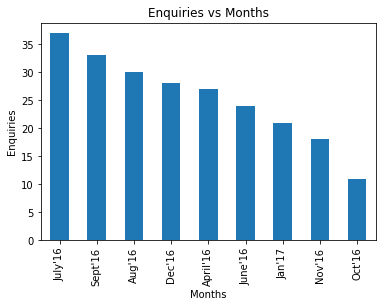

In [25]:
plt.figure()
ret['Month'].value_counts().plot.bar()
plt.xlabel('Months')
plt.ylabel('Enquiries')
plt.title('Enquiries vs Months')
plt.show()

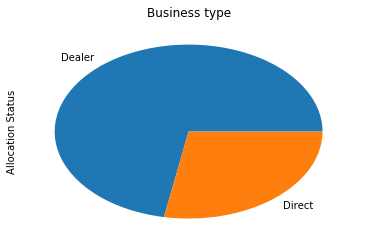

In [30]:
plt.figure()
ret['Allocation Status'].value_counts().plot.pie()
plt.title('Business type')
plt.show()

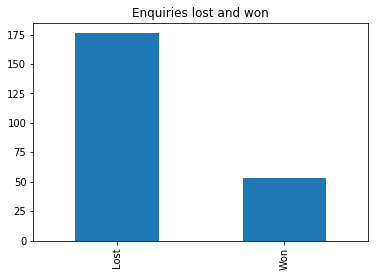

In [33]:
ret['Status'].value_counts().plot.bar()
plt.title('Enquiries lost and won')
plt.show()

In [34]:
#only few of the enquiries are materialized

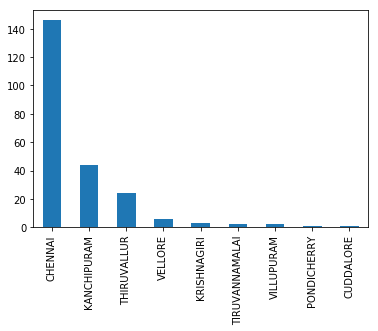

In [35]:
ret['City'].value_counts().plot.bar()

In [36]:
ret.columns

Index(['Month', 'Enquiry Date', 'Enquiry Id', 'Allocation Status', 'Status',
       'State', 'City', 'Pincode', 'Type of Project', 'No of Windows',
       'Source', 'Zone', 'Dealer Name', 'First Action-Call made',
       'Date DD/MM/YY', 'First Action-Call Status',
       'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date DD/MM/YY.1', 'Second Action-Call Status',
       'Third Action-Quote Given', 'Date DD/MM/YY.2', 'Q Val. (Rs. Lac)',
       'Quote QTY', ' Order Recd\Lost ', 'Date DD/MM/YY.3',
       'Order Val. (Rs. Lac)', 'Order QTY',
       'Quote ID (as per match to CCC Records)',
       ' Remarks-Brand and value if lost to UPVC ',
       'Second Action-Call Status.1', 'Remarks', 'Price Per Sft', 'Benefits',
       'Aesthetics', 'Reduce Street Noise', 'Low Maintenance', 'Monsoon Proof',
       'Better Lighting', 'Reduce AC Energy Cost'],
      dtype='object')

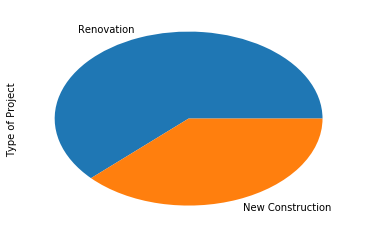

In [40]:
ret['Type of Project'].value_counts().plot.pie()

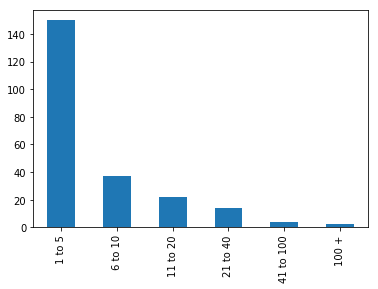

In [44]:
ret['No of Windows'].value_counts().plot.bar()

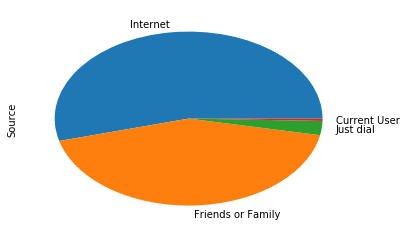

In [46]:
ret['Source'].value_counts().plot.pie()

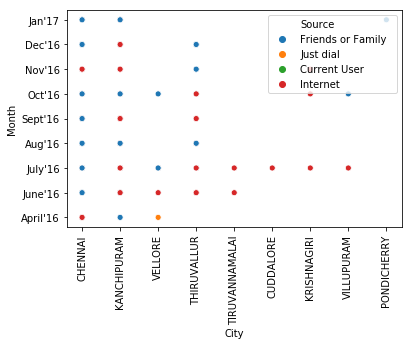

In [56]:
sns.scatterplot(data=ret,x='City',y='Month',hue='Source')
plt.xticks(rotation=90)
plt.show()

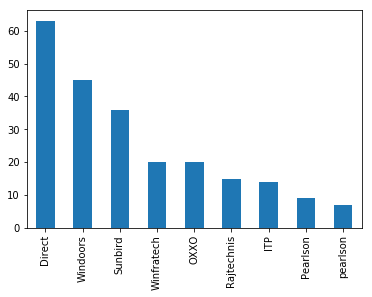

In [80]:
ret['Dealer Name'].value_counts().plot.bar()

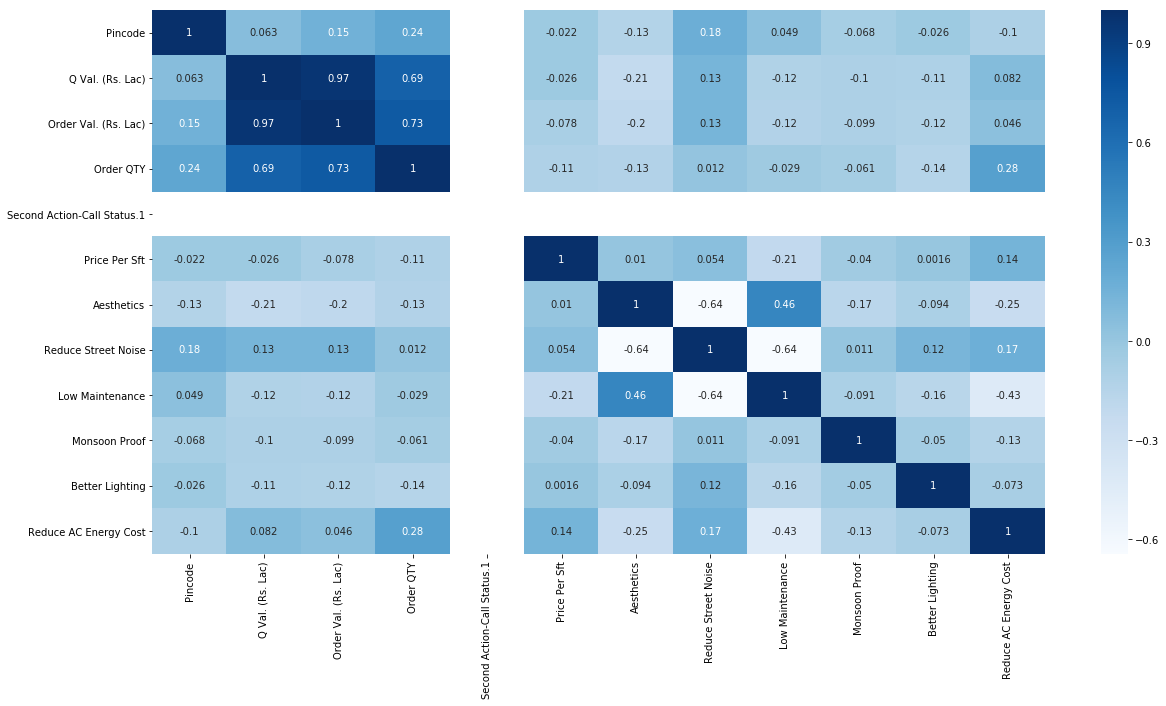

In [73]:
plt.figure(figsize=(20,10))
sns.heatmap(ret.corr(),cmap='Blues',annot=True)

In [81]:
def dealer_name(x):
    if x == 'pearlson':
        return 'Pearlson'
    else:
        return x
dealer_name()

In [84]:
type(ret['Dealer Name'])

pandas.core.series.Series

In [85]:
ret['Dealer Name']  = ret['Dealer Name'].apply(dealer_name)

In [92]:
ret['Dealer Name'] = ret['Dealer Name'].replace({'pearlson':'Pearlson'})

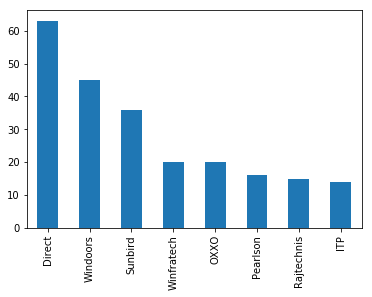

In [94]:
ret['Dealer Name'].value_counts().plot.bar()

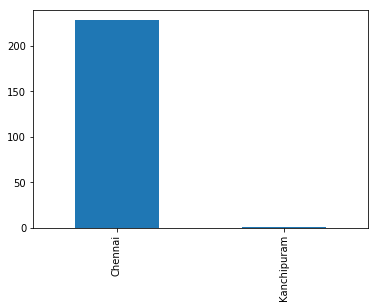

In [98]:
ret['Zone'].value_counts().plot.bar()

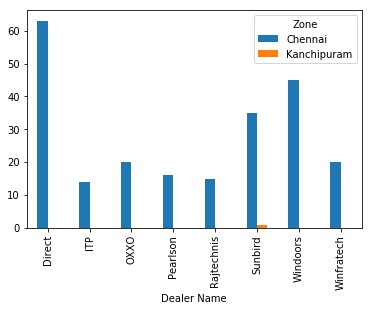

In [104]:
pd.crosstab(ret['Dealer Name'],ret['Zone']).plot.bar()

In [109]:
ret.groupby(['Dealer Name','Zone']).agg({'Zone':'count'})

Zone
Dealer Name Zone             
Direct      Chennai        63
ITP         Chennai        14
OXXO        Chennai        20
Pearlson    Chennai        16
Rajtechnis  Chennai        15
Sunbird     Chennai        35
            Kanchipuram     1
Windoors    Chennai        45
Winfratech  Chennai        20

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

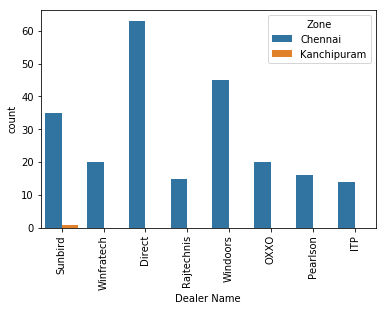

In [118]:
sns.countplot(data=ret,x='Dealer Name',hue='Zone')
plt.xticks(rotation=90)

In [119]:
ret.columns

Index(['Month', 'Enquiry Date', 'Enquiry Id', 'Allocation Status', 'Status',
       'State', 'City', 'Pincode', 'Type of Project', 'No of Windows',
       'Source', 'Zone', 'Dealer Name', 'First Action-Call made',
       'Date DD/MM/YY', 'First Action-Call Status',
       'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date DD/MM/YY.1', 'Second Action-Call Status',
       'Third Action-Quote Given', 'Date DD/MM/YY.2', 'Q Val. (Rs. Lac)',
       'Quote QTY', ' Order Recd\Lost ', 'Date DD/MM/YY.3',
       'Order Val. (Rs. Lac)', 'Order QTY',
       'Quote ID (as per match to CCC Records)',
       ' Remarks-Brand and value if lost to UPVC ',
       'Second Action-Call Status.1', 'Remarks', 'Price Per Sft', 'Benefits',
       'Aesthetics', 'Reduce Street Noise', 'Low Maintenance', 'Monsoon Proof',
       'Better Lighting', 'Reduce AC Energy Cost'],
      dtype='object')

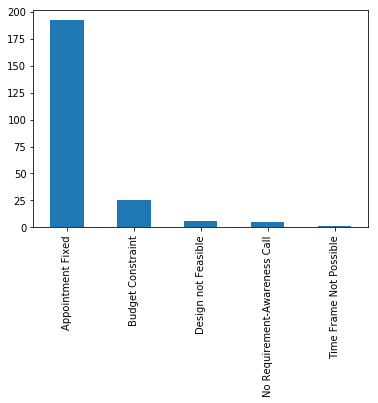

In [122]:
ret['First Action-Call Status'].value_counts().plot.bar()

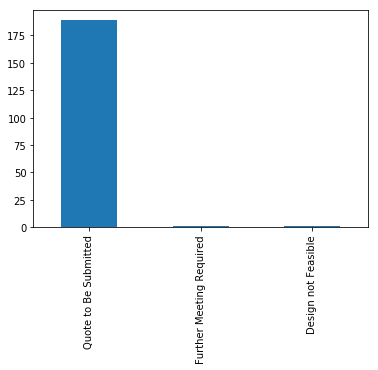

In [123]:
ret['Second Action-Call Status'].value_counts().plot.bar()

In [128]:
ret['Status'].value_counts()

Lost    176
Won      53
Name: Status, dtype: int64

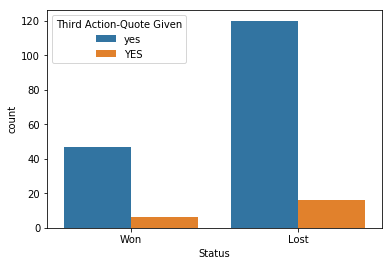

In [131]:
sns.countplot(data=ret,x='Status',hue='Third Action-Quote Given')

In [137]:
ret.groupby(['Third Action-Quote Given','Status']).agg({'Third Action-Quote Given':'count'})

Third Action-Quote Given
Third Action-Quote Given Status                          
YES                      Lost                          16
                         Won                            6
yes                      Lost                         120
                         Won                           47

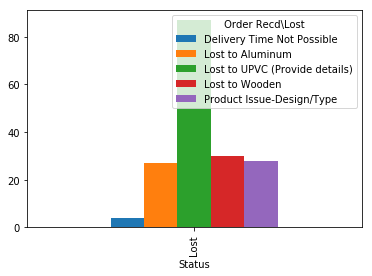

In [166]:
pd.crosstab(ret[ret['Status']=='Lost']['Status'],ret[' Order Recd\Lost ']).plot.bar()

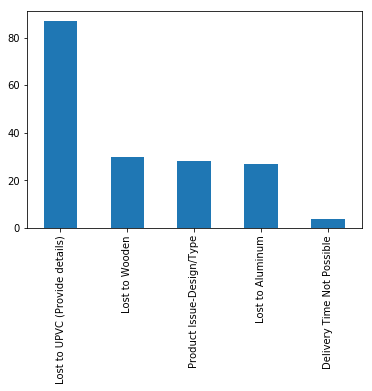

In [170]:
ret[ret['Status']=='Lost'][' Order Recd\Lost '].value_counts().plot.bar()

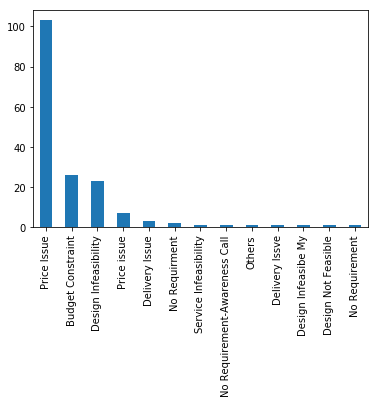

In [173]:
ret['Remarks'].value_counts().plot.bar()

In [183]:
ret.isna().sum()[ret.isna().sum()!=0]

Date of Appointment (DD/MM/YY)                37
Second Action-Customer Meeting                37
Date DD/MM/YY.1                               37
Second Action-Call Status                     38
Third Action-Quote Given                      40
Date DD/MM/YY.2                               41
Q Val. (Rs. Lac)                              46
Quote QTY                                     46
Date DD/MM/YY.3                              181
Order Val. (Rs. Lac)                         181
Order QTY                                    181
Quote ID (as per match to CCC Records)       113
 Remarks-Brand and value if lost to UPVC     106
Second Action-Call Status.1                  229
Remarks                                       58
Benefits                                     176
Aesthetics                                   192
Reduce Street Noise                          192
Low Maintenance                              192
Monsoon Proof                                192
Better Lighting     

In [186]:
ret['Order QTY'].fillna(value=0,inplace=True)

In [188]:
ret['Order QTY'].head()

0    3.0
1    0.0
2    0.0
3    0.0
4    8.0
Name: Order QTY, dtype: float64

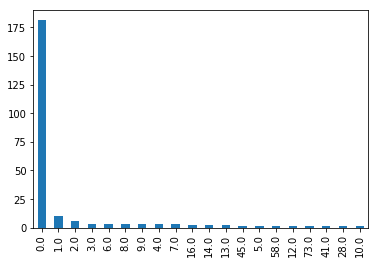

In [191]:
ret['Order QTY'].value_counts().plot.bar()

In [194]:
for col in ret.columns:
    if ret[col].isnull().sum():
        print("Missing percentage in ",col,"is ",round(ret[col].isnull().sum()*100/ret.shape[0]))

Missing percentage in  Date of Appointment (DD/MM/YY) is  16.0
Missing percentage in  Second Action-Customer Meeting is  16.0
Missing percentage in  Date DD/MM/YY.1 is  16.0
Missing percentage in  Second Action-Call Status is  17.0
Missing percentage in  Third Action-Quote Given is  17.0
Missing percentage in  Date DD/MM/YY.2 is  18.0
Missing percentage in  Q Val. (Rs. Lac) is  20.0
Missing percentage in  Quote QTY is  20.0
Missing percentage in  Date DD/MM/YY.3 is  79.0
Missing percentage in  Order Val. (Rs. Lac) is  79.0
Missing percentage in  Quote ID (as per match to CCC Records) is  49.0
Missing percentage in   Remarks-Brand and value if lost to UPVC  is  46.0
Missing percentage in  Second Action-Call Status.1 is  100.0
Missing percentage in  Remarks is  25.0
Missing percentage in  Benefits is  77.0
Missing percentage in  Aesthetics is  84.0
Missing percentage in  Reduce Street Noise is  84.0
Missing percentage in  Low Maintenance is  84.0
Missing percentage in  Monsoon Proof is  

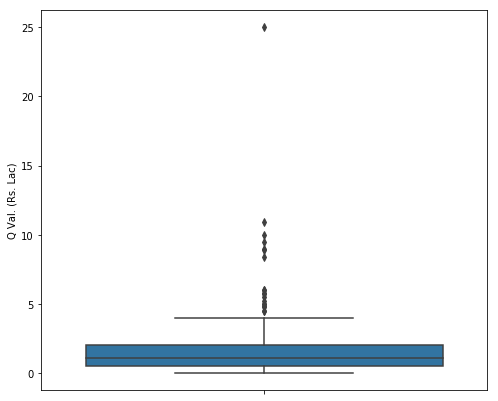

In [205]:
plt.figure(figsize=(8,7))
sns.boxplot(data=ret,x='Q Val. (Rs. Lac)',orient='v')

In [196]:
ret.columns

Index(['Month', 'Enquiry Date', 'Enquiry Id', 'Allocation Status', 'Status',
       'State', 'City', 'Pincode', 'Type of Project', 'No of Windows',
       'Source', 'Zone', 'Dealer Name', 'First Action-Call made',
       'Date DD/MM/YY', 'First Action-Call Status',
       'Date of Appointment (DD/MM/YY)', 'Second Action-Customer Meeting',
       'Date DD/MM/YY.1', 'Second Action-Call Status',
       'Third Action-Quote Given', 'Date DD/MM/YY.2', 'Q Val. (Rs. Lac)',
       'Quote QTY', ' Order Recd\Lost ', 'Date DD/MM/YY.3',
       'Order Val. (Rs. Lac)', 'Order QTY',
       'Quote ID (as per match to CCC Records)',
       ' Remarks-Brand and value if lost to UPVC ',
       'Second Action-Call Status.1', 'Remarks', 'Price Per Sft', 'Benefits',
       'Aesthetics', 'Reduce Street Noise', 'Low Maintenance', 'Monsoon Proof',
       'Better Lighting', 'Reduce AC Energy Cost'],
      dtype='object')

In [207]:
from scipy.stats import zscore,skew

C:\Users\shaur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\shaur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


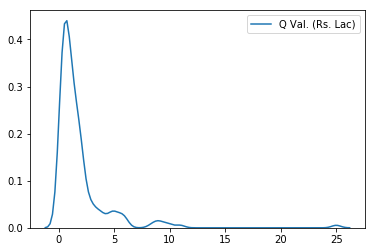

In [212]:
sns.kdeplot(ret['Q Val. (Rs. Lac)'])

In [219]:
ret['Q Val. (Rs. Lac)'].fillna(value=ret['Q Val. (Rs. Lac)'].median(),inplace=True)

In [232]:
ret['zscore'] = zscore(ret['Q Val. (Rs. Lac)'])

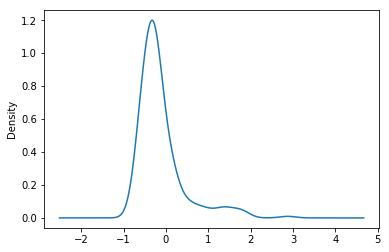

In [239]:
ret[(ret['zscore']>-3) & (ret['zscore']<3)]['zscore'].plot(kind='kde')

In [240]:
tel =  pd.read_csv('Telecom_Industry.csv')

In [241]:
tel.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [242]:
tel.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3331.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237346
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.792675
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


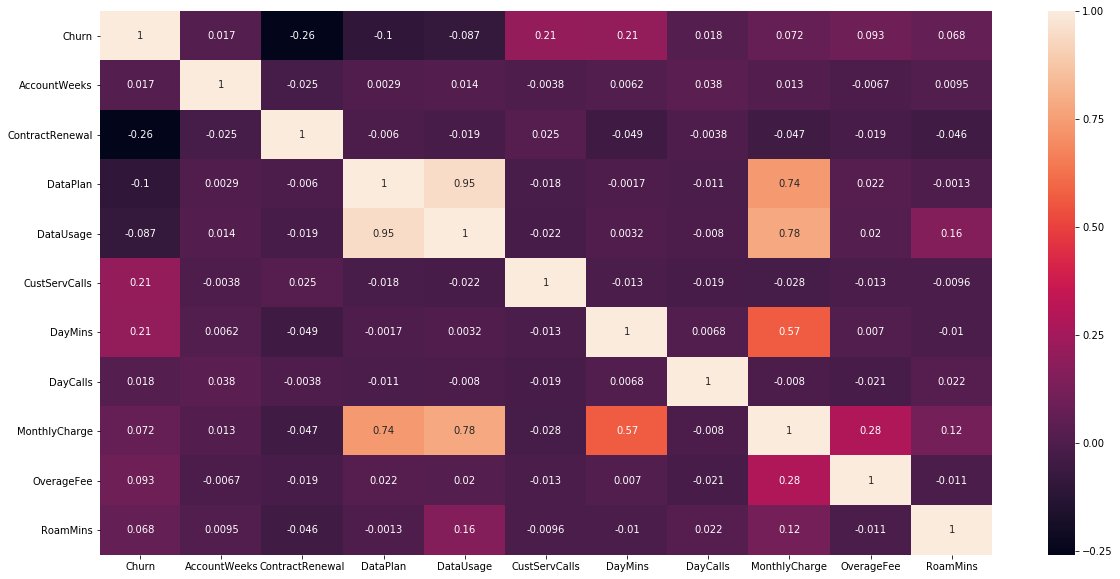

In [244]:
plt.figure(figsize=(20,10))
sns.heatmap(tel.corr(),annot=True)

In [245]:
##if two variable are highly correlated, we can drop one column. Such as Monthly charge and DataPlan are highly correlated

C:\Users\shaur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shaur\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


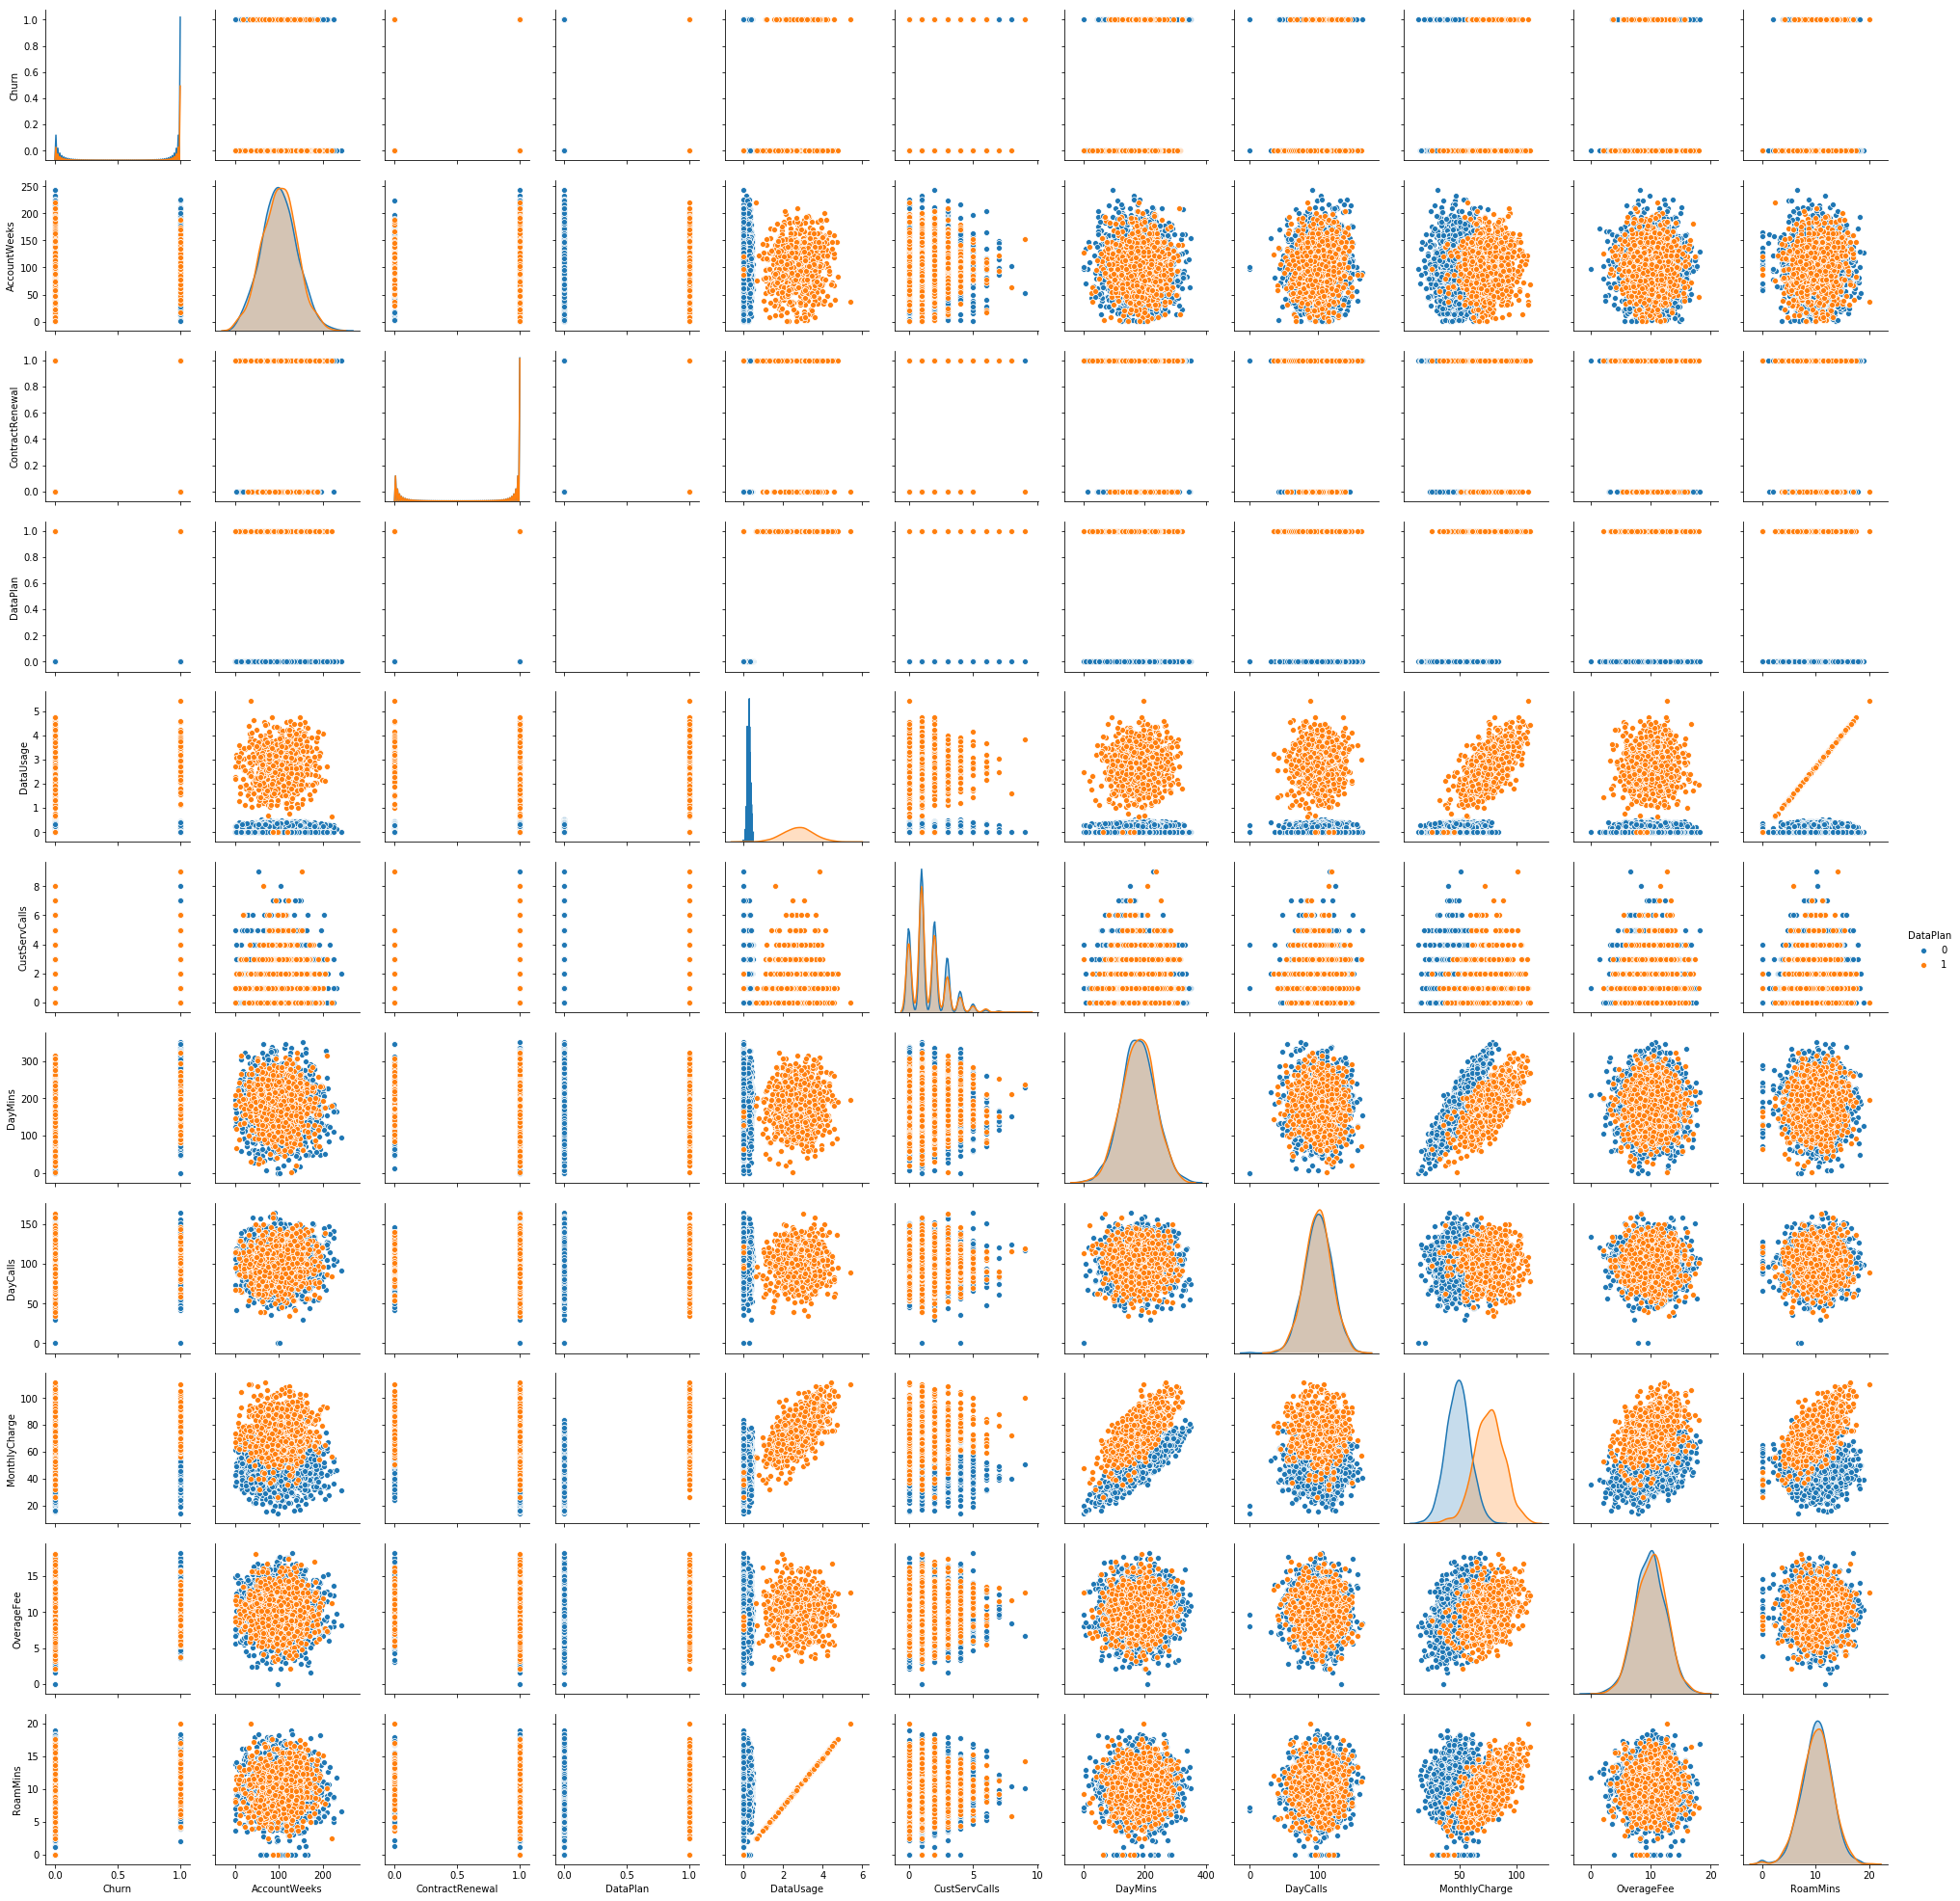

In [251]:
sns.pairplot(data=tel,hue='DataPlan')

In [253]:
tel['RoamMins'].fillna(value=tel['RoamMins'].median(),inplace=True)

In [254]:
tel['RoamMins'].head()

0    10.0
1    13.7
2    12.2
3     6.6
4    10.1
Name: RoamMins, dtype: float64

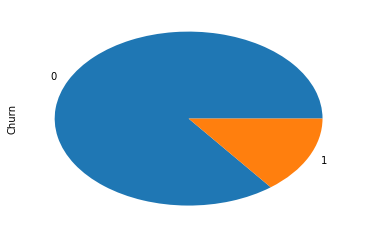

In [255]:
tel['Churn'].value_counts().plot.pie()

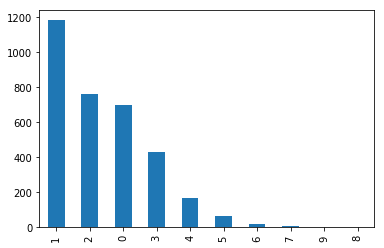

In [258]:
tel['CustServCalls'].value_counts().plot.bar()

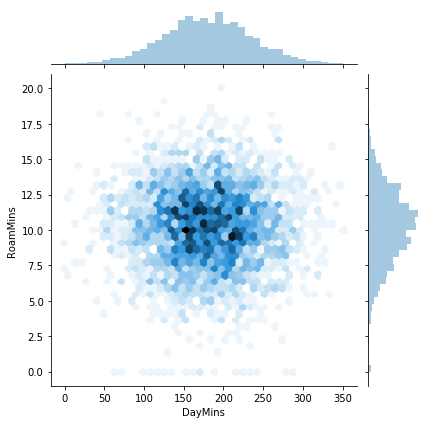

In [273]:
sns.jointplot(data=tel,x='DayMins',y='RoamMins',kind='hex')

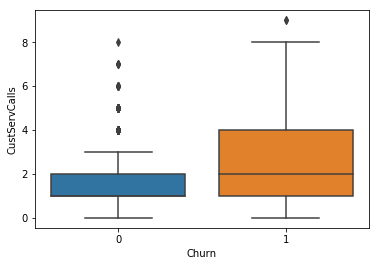

In [281]:
sns.boxplot(data=tel,x='Churn',y='CustServCalls')

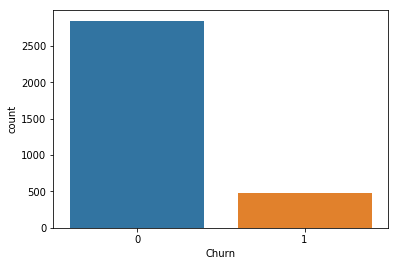

In [292]:
sns.countplot(data=tel,x='Churn')

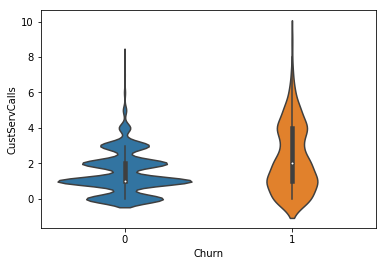

In [283]:
sns.violinplot(data=tel,x='Churn',y='CustServCalls')

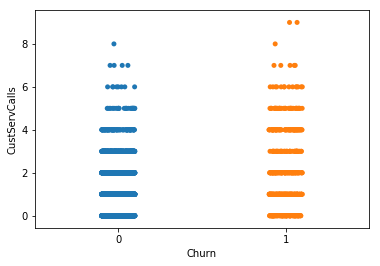

In [286]:
sns.stripplot(data=tel,x='Churn',y='CustServCalls')

In [294]:
from sklearn.datasets import load_iris
iris = load_iris()

In [295]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [298]:
data.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth']

In [299]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [310]:
wine = pd.read_csv('Wine_data.csv')

In [311]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [312]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


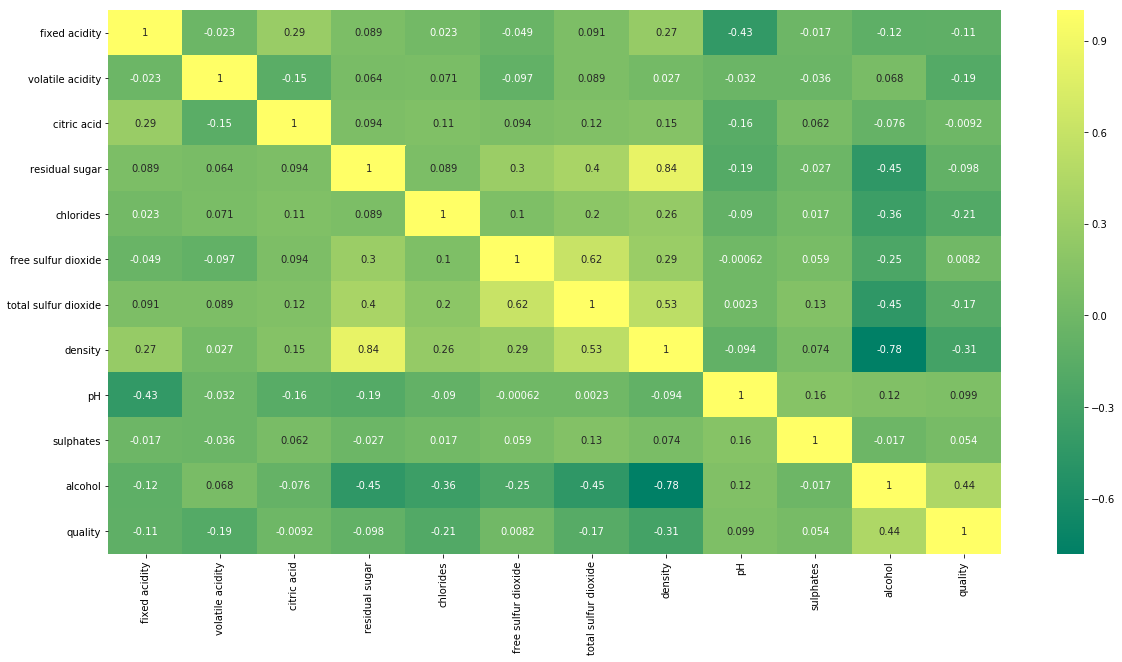

In [317]:
plt.figure(figsize=(20,10))
sns.heatmap(wine.corr(),cmap='summer',annot=True)

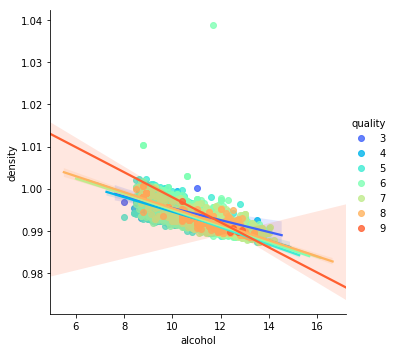

In [348]:
sns.lmplot(data=wine,x='alcohol',y='density',hue='quality',fit_reg=True,scatter=True,palette='rainbow',x_jitter=False)